In [1]:
import json                                        # to work with json file
import pandas as pd                                # to work with dataframes
import numpy as np                                 # to work with numpy arrays
import gzip                                        # to extract work file from zip file
import nltk                                        # working with nlp algorithms
from nltk.sentiment import SentimentIntensityAnalyzer  # To predict the sentiments based on the text
from tqdm.notebook import tqdm                     # library for adding progress bar
import sklearn                                     # to working with machine learning algorithms
from sklearn.linear_model import LogisticRegression  # Classification algorithm
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer # To convert text to numerical based on tfidf score
from nltk.corpus import stopwords                  # to detect stopwords
import re                                          # To remove the unwanted text
from sklearn.metrics import classification_report  # Classification report
from sklearn.metrics import accuracy_score         # evaluation metric
from sklearn.metrics import f1_score               # evaluation metric
from sklearn.metrics import recall_score           # evaluation metric
from sklearn.metrics import precision_score        # evaluation metric
from sklearn.model_selection import train_test_split # train test split
import time                                        # to check the processing time
from sklearn.preprocessing import LabelEncoder     # To convert categorical to numerical
import warnings
warnings.filterwarnings('ignore')                  # To ignore the warnings
from sklearn.model_selection import StratifiedKFold # Splitting
from sklearn.naive_bayes import MultinomialNB       # Naive bayes algorithm
import matplotlib.pyplot as plt                     # Visualization tool
import seaborn as sns                               # Visualization tool
from statsmodels.tsa.seasonal import seasonal_decompose            # Time series components
from statsmodels.tsa.stattools import adfuller                      # To find the stationarity of the data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf       # To plot ACF and PACF plots
from statsmodels.tsa.arima.model import ARIMA                       # To build the ARIMA model
from sklearn.metrics import mean_squared_error                      # To check the mean square error                                      
from statsmodels.tsa.statespace.sarimax import SARIMAX              # To build the sarimax model
from sklearn.neighbors import NearestNeighbors                      # KNN algorithm
from sklearn.metrics.pairwise import cosine_similarity              # Asign correlation between the features
import scipy.sparse                                                 #
from scipy.sparse import csr_matrix                                 # Correlation Matrix
from scipy.sparse.linalg import svds                                #
from sklearn.preprocessing import MinMaxScaler, StandardScaler      # For Scaling the data
from sklearn.cluster import KMeans                                  # For Cluster Formation  
from sklearn.feature_extraction.text import CountVectorizer         # For Vectorisation
from wordcloud import WordCloud, STOPWORDS                          # For Word Cloud
from sklearn import metrics                                         # For Matrics Algorithms
from sklearn.metrics import classification_report                   # For Classification Evaluation Report
from datetime import datetime, timedelta,date
from sklearn.metrics import confusion_matrix                        # It shows the tabel of probability values
from sklearn.metrics import plot_confusion_matrix                   # plot of confusion matrix
from sklearn.metrics import mean_squared_error # To check the mean square error 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv('musical_instruments_data.csv')
df.head()

,Unnamed: 0,asin,title,overall,brand,rank,verified,reviewerID,reviewerName,reviewTime,price,style,category,also_buy,also_view,main_cat,similar_item,Review,polarity,Sentiment
0,24539,B0002BFNO0,Bass Assassin Curly Shads,3,Bass Assassin,390192,False,A3NTFZS442MKPG,Mark,2014-08-18,5.74,2Inch Crystal Shad,"['Musical Instruments', 'Guitars']","['B005Z829YC', 'B0084EHLLK', 'B003ZZ81AS', 'B0...","['B008DR4XDM', 'B009M3TP3Y', 'B009A77KR0', 'B0...",Sports &amp; Outdoors,NaN,palstic grubsthree star,0.000000,Neutral
1,24541,B0002BFNO0,Bass Assassin Curly Shads,1,Bass Assassin,390192,True,A2II5RVB13J0M5,Ignacio Ruben Garibay,2014-06-18,5.74,2Inch Black Shad,"['Musical Instruments', 'Guitars']","['B005Z829YC', 'B0084EHLLK', 'B003ZZ81AS', 'B0...","['B008DR4XDM', 'B009M3TP3Y', 'B009A77KR0', 'B0...",Sports &amp; Outdoors,NaN,leave home star rating simply not work color l...,-0.183333,Negative
2,24543,B0002BFNO0,Bass Assassin Curly Shads,5,Bass Assassin,390192,True,AC29NDEY0MZQD,j harr1187,2014-04-01,5.74,2Inch Crystal Shad,"['Musical Instruments', 'Guitars']","['B005Z829YC', 'B0084EHLLK', 'B003ZZ81AS', 'B0...","['B008DR4XDM', 'B009M3TP3Y', 'B009A77KR0', 'B0...",Sports &amp; Outdoors,NaN,well soft bait catch killer crappie bass small...,0.150000,Positive
3,24545,B0002BFNO0,Bass Assassin Curly Shads,3,Bass Assassin,390192,True,A1YZIGL9TPCRD,THONG FANG,2013-05-28,5.74,2Inch Black Shad,"['Musical Instruments', 'Guitars']","['B005Z829YC', 'B0084EHLLK', 'B003ZZ81AS', 'B0...","['B008DR4XDM', 'B009M3TP3Y', 'B009A77KR0', 'B0...",Sports &amp; Outdoors,NaN,good catch crappie bass wiggly tail fishs atte...,0.062500,Positive
4,24547,B0002BFNO0,Bass Assassin Curly Shads,5,Bass Assassin,390192,True,A1UY5XOHNC97PY,Merryheart13,2018-03-06,5.74,2Inch Black Shad,"['Musical Instruments', 'Guitars']","['B005Z829YC', 'B0084EHLLK', 'B003ZZ81AS', 'B0...","['B008DR4XDM', 'B009M3TP3Y', 'B009A77KR0', 'B0...",Sports &amp; Outdoors,NaN,hubby love lake fish exactly describe happy pu...,0.520000,Positive


In [3]:
df.isnull().sum()

Unnamed: 0         0
asin               0
title              0
overall            0
brand              0
rank               0
verified           0
reviewerID         0
reviewerName       0
reviewTime         0
price             16
style              0
category           0
also_buy           0
also_view          0
main_cat           0
similar_item    1213
Review             0
polarity           0
Sentiment          0
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df.shape

(3153, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3153 entries, 168 to 4345
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    3153 non-null   int64  
 1   asin          3153 non-null   object 
 2   title         3153 non-null   object 
 3   overall       3153 non-null   int64  
 4   brand         3153 non-null   object 
 5   rank          3153 non-null   int64  
 6   verified      3153 non-null   bool   
 7   reviewerID    3153 non-null   object 
 8   reviewerName  3153 non-null   object 
 9   reviewTime    3153 non-null   object 
 10  price         3153 non-null   float64
 11  style         3153 non-null   object 
 12  category      3153 non-null   object 
 13  also_buy      3153 non-null   object 
 14  also_view     3153 non-null   object 
 15  main_cat      3153 non-null   object 
 16  similar_item  3153 non-null   object 
 17  Review        3153 non-null   object 
 18  polarity      3153 non-nul

In [7]:
X = df["Review"]

In [8]:
y = df["Sentiment"]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state = 42)

In [10]:
vectorizer = CountVectorizer(min_df=5).fit(x_train)
X_train = vectorizer.transform(x_train)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<2522x1113 sparse matrix of type '<class 'numpy.int64'>'
	with 32367 stored elements in Compressed Sparse Row format>


In [11]:
X_test = vectorizer.transform(x_test)

In [12]:
def model_evaluator(model):
    
    model.fit(X_train,y_train)
    y_pred= model.predict(X_test)
    
    acc_test= accuracy_score(y_test,y_pred,)
    rec= recall_score(y_test,y_pred,average="weighted")
    fs = f1_score(y_test,y_pred,average="weighted")
    ps= precision_score(y_test, y_pred,average="weighted")
    cfm = confusion_matrix(y_test, y_pred)
    
    print("Accuracy: ",acc_test)
    print("Recall Score: ", rec)
    print("f1_score: ",fs)  
    print("Precision score: ",ps)   
    

    print()
    print("\t\t\tClassification Report")
    print("--"*50)
    print(classification_report(y_test,y_pred))
    print("\n confusion_matrix: \n",cfm)
    
    return acc_test,rec,fs,ps,cfm

In [13]:
logi_model = LogisticRegression()

In [14]:
acc_test_lr,rec_lr,fs_lr,ps_lr,cfm_lr=model_evaluator(logi_model)

Accuracy:  0.9033280507131537
Recall Score:  0.9033280507131537
f1_score:  0.8942356309638259
Precision score:  0.8918649299583977

			Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.60      0.34      0.43        53
     Neutral       0.86      0.90      0.88        93
    Positive       0.93      0.96      0.95       485

    accuracy                           0.90       631
   macro avg       0.80      0.74      0.75       631
weighted avg       0.89      0.90      0.89       631


 confusion_matrix: 
 [[ 18   7  28]
 [  2  84   7]
 [ 10   7 468]]


## Decision Tree

In [15]:
dtree_model = DecisionTreeClassifier()

In [16]:
acc_test_dt,rec_dt,fs_dt,ps_dt,cfm_dt=model_evaluator(dtree_model)

Accuracy:  0.838351822503962
Recall Score:  0.838351822503962
f1_score:  0.8368961004142914
Precision score:  0.8372026809000376

			Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.30      0.26      0.28        53
     Neutral       0.70      0.82      0.75        93
    Positive       0.92      0.91      0.91       485

    accuracy                           0.84       631
   macro avg       0.64      0.66      0.65       631
weighted avg       0.84      0.84      0.84       631


 confusion_matrix: 
 [[ 14  13  26]
 [  6  76  11]
 [ 26  20 439]]


### Random Forest

In [17]:
rf_model = RandomForestClassifier()

In [18]:
acc_test_rf,rec_rf,fs_rf,ps_rf,cfm_rf=model_evaluator(rf_model)

Accuracy:  0.8748019017432647
Recall Score:  0.8748019017432647
f1_score:  0.8456405341158997
Precision score:  0.8694985978634145

			Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.80      0.08      0.14        53
     Neutral       0.77      0.85      0.81        93
    Positive       0.90      0.97      0.93       485

    accuracy                           0.87       631
   macro avg       0.82      0.63      0.62       631
weighted avg       0.87      0.87      0.85       631


 confusion_matrix: 
 [[  4   8  41]
 [  1  79  13]
 [  0  16 469]]


### K-Neighbors

In [19]:
from sklearn.neighbors import KNeighborsClassifier
kn_model=KNeighborsClassifier()

In [20]:
acc_test_kn,rec_kn,fs_kn,ps_kn,cfm_kn=model_evaluator(kn_model)

Accuracy:  0.7464342313787639
Recall Score:  0.7464342313787639
f1_score:  0.7566257528181148
Precision score:  0.8206113804327605

			Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.26      0.09      0.14        53
     Neutral       0.40      0.95      0.56        93
    Positive       0.96      0.78      0.86       485

    accuracy                           0.75       631
   macro avg       0.54      0.61      0.52       631
weighted avg       0.82      0.75      0.76       631


 confusion_matrix: 
 [[  5  37  11]
 [  1  88   4]
 [ 13  94 378]]


In [21]:
model_name= ["LogisticRegression","DecisionTreeClassifier","Knn - Classifier","Random Forest Classifire"]

Accuracy=[acc_test_lr,acc_test_dt,acc_test_kn,acc_test_rf]
recall_score=[rec_lr,rec_dt,rec_kn,rec_rf]
f1_score=[fs_lr,fs_dt,fs_kn,fs_rf]
precision_score=[ps_lr,ps_dt,ps_kn,ps_rf]


data= {"Accuracy":Accuracy,
              "recall_score":recall_score,
              "f1_score":f1_score,
              "precision_score":precision_score,}

dff=pd.DataFrame(data, index=model_name)
dff

,Accuracy,recall_score,f1_score,precision_score
LogisticRegression,0.903328,0.903328,0.894236,0.891865
DecisionTreeClassifier,0.838352,0.838352,0.836896,0.837203
Knn - Classifier,0.746434,0.746434,0.756626,0.820611
Random Forest Classifire,0.874802,0.874802,0.845641,0.869499


- From the above Comparison Report we understand that out of all the 3 classification models Logistic Regression gives us the best output.

## Prediction

In [22]:
logi_model.predict(vectorizer.transform(['love cd il volo young man true gift lucky sharing I m look forward hear operatic poplove cd il volo']))

array(['Positive'], dtype=object)

In [23]:
logi_model.predict(vectorizer.transform(['excellentttttfive star']))

array(['Neutral'], dtype=object)

In [24]:
logi_model.predict(vectorizer.transform(['unbeatable performance pricecannot wrong']))

array(['Negative'], dtype=object)

### Remove text-Stop words
Coming to stop words, general nltk stop words contains words like not,hasn't,would'nt which actually conveys a negative sentiment. If we remove that it will end up contradicting the target variable(sentiment). So I have curated the stop words which doesn't have any negative sentiment or any negative alternatives.

In [25]:
# Getting stop words
nltk.download('stopwords')

stop_words = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ARCHIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
# applying stopword function on reviewText
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [27]:
# For WordCloud
stopwords = set(STOPWORDS)
def word_cloud(data, title):
    wordcloud = WordCloud(
    background_color = "black",
    max_font_size = 40,
    max_words = 200,
    stopwords = stopwords,
    scale = 3).generate(str(df['Review']))
    fig = plt.figure(figsize = (15, 15))
    plt.axis("off")
    if title: 
        fig.suptitle(title, fontsize=15)
        fig.subplots_adjust(top=2.25)
    plt.imshow(wordcloud)
    plt.show()

In [28]:
df.columns

Index(['Unnamed: 0', 'asin', 'title', 'overall', 'brand', 'rank', 'verified',
       'reviewerID', 'reviewerName', 'reviewTime', 'price', 'style',
       'category', 'also_buy', 'also_view', 'main_cat', 'similar_item',
       'Review', 'polarity', 'Sentiment'],
      dtype='object')

In [29]:
neg=df[df["Sentiment"] == "Neg"]["Review"]
pos=df[df["Sentiment"] == "Pos"]["Review"]
neu=df[df["Sentiment"] == "Neutral"]["Review"]

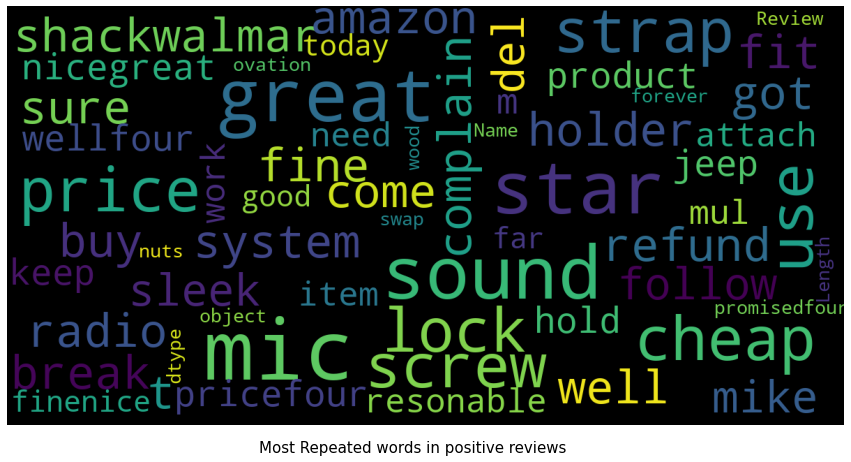

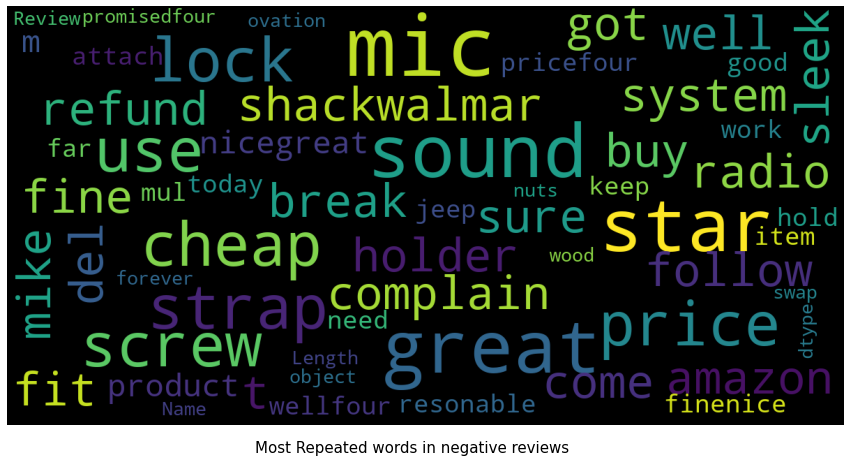

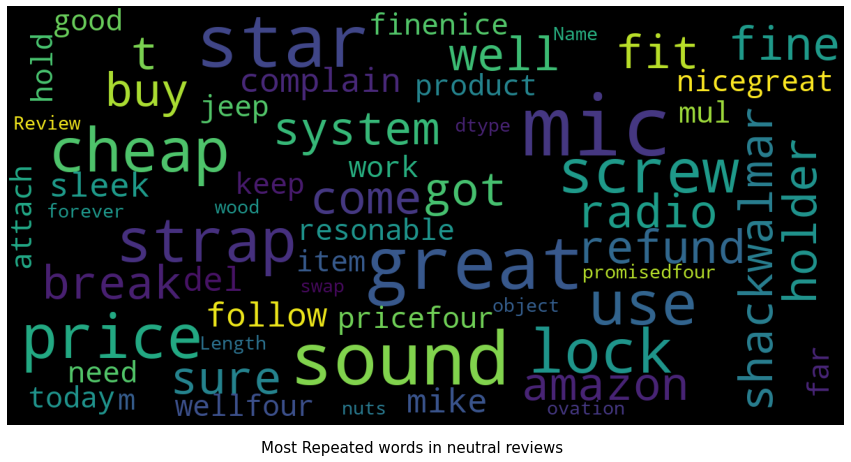

In [30]:
word_cloud(pos, "Most Repeated words in positive reviews")
word_cloud(neg, "Most Repeated words in negative reviews")
word_cloud(neu, "Most Repeated words in neutral reviews")

### <div class="alert alert-info">Interpretation
**- From the above plots we can see that most used positive, negative and neutral words from the Review column**</div>

## &#10148; Clustering</br>
- Cluster analysis is the grouping of objects such that objects in the same cluster are more similar to each other than they are to objects in another cluster. The classification into clusters is done using criteria such as smallest distances, density of data points, graphs, or various statistical distributions.

In [31]:
df["reviewTime"] = pd.to_datetime(df["reviewTime"])

In [32]:
# Convert the datetime column to Unix timestamps
df['unixReviewTime'] = (pd.DatetimeIndex(df['reviewTime']).astype('int64') // 10**9)

# Print the resulting DataFrame
df

,Unnamed: 0,asin,title,overall,brand,rank,verified,reviewerID,reviewerName,reviewTime,...,style,category,also_buy,also_view,main_cat,similar_item,Review,polarity,Sentiment,unixReviewTime
168,292216,B000NJ2TIE,Behringer Ultravoice XM1800S Dynamic Cardioid ...,3,Behringer,495,True,AQP1Z1ZYAYQ5B,Christopher W. Parrett,2018-04-09,...,Black,"['Musical Instruments', 'Microphones & Accesso...","['B00X7YJUGG', 'B01JNLUMMW', 'B00O5EL4MA', 'B0...",[],Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...",sure system sound well cheap radio shackwalmar...,0.030000,Positive,1523232000
169,292217,B000NJ2TIE,Behringer Ultravoice XM1800S Dynamic Cardioid ...,3,Behringer,495,True,ATNOW4ID9AXGS,FoxyNC,2018-03-25,...,Black,"['Musical Instruments', 'Microphones & Accesso...","['B00X7YJUGG', 'B01JNLUMMW', 'B00O5EL4MA', 'B0...",[],Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...",mic fine mic holder cheap fit mic come break t...,-0.022222,Negative,1521936000
170,292218,B000NJ2TIE,Behringer Ultravoice XM1800S Dynamic Cardioid ...,4,Behringer,495,True,A2LJ0XC4FGTTH9,Kevin Davey,2018-03-23,...,Black,"['Musical Instruments', 'Microphones & Accesso...","['B00X7YJUGG', 'B01JNLUMMW', 'B00O5EL4MA', 'B0...",[],Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...",buy mics refund got amazon complain follow del...,0.109598,Positive,1521763200
171,292219,B000NJ2TIE,Behringer Ultravoice XM1800S Dynamic Cardioid ...,4,Behringer,495,True,A2O27ROXLHLJQB,Bobe,2018-03-22,...,Black,"['Musical Instruments', 'Microphones & Accesso...","['B00X7YJUGG', 'B01JNLUMMW', 'B00O5EL4MA', 'B0...",[],Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...",great mike great sound sleek nicegreat sound m...,0.580000,Positive,1521676800
172,292220,B000NJ2TIE,Behringer Ultravoice XM1800S Dynamic Cardioid ...,4,Behringer,495,True,A34N9XXB4M2WC,Carrie,2018-03-21,...,Black,"['Musical Instruments', 'Microphones & Accesso...","['B00X7YJUGG', 'B01JNLUMMW', 'B00O5EL4MA', 'B0...",[],Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...",great product pricefour star,0.800000,Positive,1521590400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4309,785464,B00SUQ9F4S,Fire Force 1&quot; Cinch Strap with Military A...,4,Fire Force,432412,True,A15A56KQ2IZ4GX,Thomas Chandler,2015-04-24,...,Black Length 7200,"['Musical Instruments', 'Instrument Accessorie...","['B005AG3R8Q', 'B00SUQ9EVM', 'B0775GGXM6', 'B0...","['B07CGZ6XND', 'B00SUQ9FDE', 'B07FMTZ5RM', 'B0...",Sports & Outdoors,"class=""a-bordered a-horizontal-stripes a-spa...",keep jeep hold wellfour star,0.000000,Neutral,1429833600
4310,785465,B00SUQ9F4S,Fire Force 1&quot; Cinch Strap with Military A...,4,Fire Force,432412,True,A35F5VTCRKJAED,Tarheel72,2015-02-25,...,Tactical Tan Length 2400,"['Musical Instruments', 'Instrument Accessorie...","['B005AG3R8Q', 'B00SUQ9EVM', 'B0775GGXM6', 'B0...","['B07CGZ6XND', 'B00SUQ9FDE', 'B07FMTZ5RM', 'B0...",Sports & Outdoors,"class=""a-bordered a-horizontal-stripes a-spa...",strap resonable price need use attach item mul...,0.073214,Positive,1424822400
4343,788633,B00VG3H47M,"C CLTEIN Guitar Strap Lock Set, Heavy Duty Met...",4,C CLTEIN,54287,True,A1BMODFI16KNNX,D.Fitzman,2018-09-05,...,Silver,"['Musical Instruments', 'Instrument Accessorie...","['B002AQNGIU', 'B06XXQDQPZ', 'B07H4GPL9Q', 'B0...","['B002AQNGIU', 'B019WTLVKW', 'B07BNQMWM4', 'B0...","<img src=""https://images-na.ssl-images-amazon....","class=""a-bordered a-horizontal-stripes a-spa...",lock screw lock work finenice price,0.000000,Neutral,1536105600
4344,788634,B00VG3H47M,"C CLTEIN Guitar Strap Lock Set, Heavy Duty Met...",4,C CLTEIN,54287,True,AXSL5YR7Q7BJH,Jay Culpepper,2018-06-17,...,Black,"['Musical Instruments', 'Instrument Accessorie...","['B002AQNGIU', 'B06XXQDQPZ', 'B07H4GPL9Q', 'B0...","['B002AQNGIU', 'B019WTLVKW', 'B07BNQMWM4', 'B0...","<img src=""https://images-na.ssl-images-amazon....","class=""a-bordered a-horizont

In [33]:
X1 = df[['price', 'unixReviewTime']]

CPU times: total: 1.5 s
Wall time: 433 ms


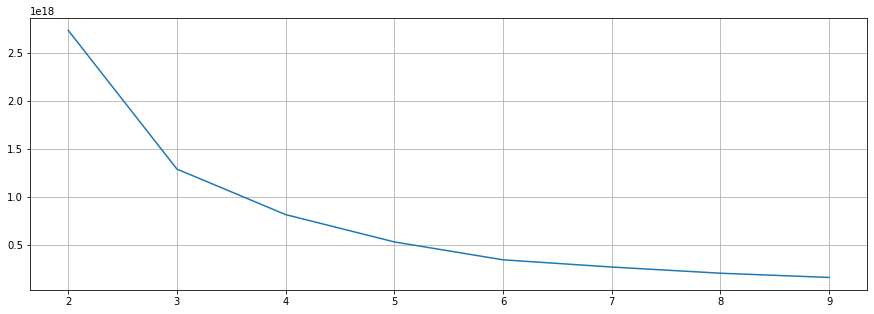

In [34]:
%%time
X1 = X1.values
distortion = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters = i).fit(X1)
    distortion.append(kmeans.inertia_)
plt.figure(figsize = (15, 5))
plt.plot(range(2, 10), distortion)
plt.grid(True)

###### Making the model and fitting it

In [35]:
%%time                                           
model1 = KMeans(n_clusters = 5, random_state = 10).fit(X1)
pred = model1.fit_predict(X1)

CPU times: total: 391 ms
Wall time: 97.2 ms


In [36]:
df.columns

Index(['Unnamed: 0', 'asin', 'title', 'overall', 'brand', 'rank', 'verified',
       'reviewerID', 'reviewerName', 'reviewTime', 'price', 'style',
       'category', 'also_buy', 'also_view', 'main_cat', 'similar_item',
       'Review', 'polarity', 'Sentiment', 'unixReviewTime'],
      dtype='object')

Text(0, 0.5, 'unixReviewTime')

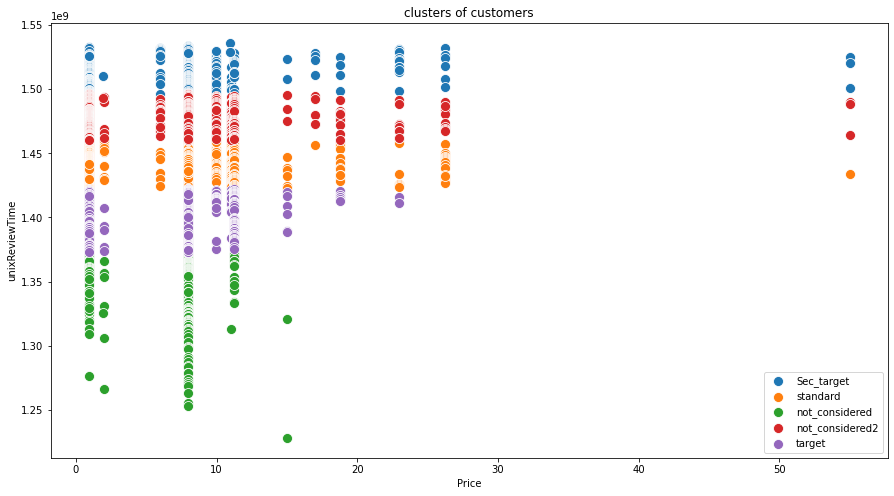

In [37]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=X1[pred==0,0] ,y=X1[pred==0,1] ,s=100,label="Sec_target")
sns.scatterplot(x=X1[pred==1,0] ,y=X1[pred==1,1],s=100,label="standard")
sns.scatterplot(x=X1[pred==2,0] ,y=X1[pred==2,1] ,s=100,label="not_considered")
sns.scatterplot(x=X1[pred==3,0] ,y=X1[pred==3,1],s=100,label="not_considered2")
sns.scatterplot(x=X1[pred==4,0] ,y=X1[pred==4,1],s=100,label="target")
#sns.scatterplot(x=kmeans.cluster_centers_[:,0] ,y= kmeans.cluster_centers_[:,1] ,s=300,label="center")
plt.title("clusters of customers")
plt.xlabel("Price")
plt.ylabel("unixReviewTime")

In [38]:
clus = df.copy()

In [39]:
# Assigning the clusters 
clusters=[]
for c in pred:
    if c==0:
        clusters.append("Sec_target")
    elif c==1:
        clusters.append("standard")
    elif c==2:
        clusters.append("not_considered")
    elif c==3:
        clusters.append("not_considered2")
    elif c==4:
        clusters.append("target") 
        
        
clus["clusters1"]=clusters

In [40]:
d1=clus[(clus["clusters1"]=='target')]
d1["overall"].value_counts()

5    347
4    110
1     41
3     35
2     21
Name: overall, dtype: int64

In [41]:
d2=clus[(clus["clusters1"]=='standard')]
d2["overall"].value_counts()

5    551
4    146
1     79
3     77
2     32
Name: overall, dtype: int64

In [42]:
d3=clus[(clus["clusters1"]=='not_considered')]
d3["overall"].value_counts()

5    138
4     49
1     12
3     11
2      7
Name: overall, dtype: int64

In [43]:
d4=clus[(clus["clusters1"]=='Sec_target')]
d4["overall"].value_counts()

5    401
4    100
1     71
3     43
2     25
Name: overall, dtype: int64

In [44]:
d5=clus[(clus["clusters1"]=='not_considered2')]
d5["overall"].value_counts()

5    546
4    129
1     79
3     66
2     37
Name: overall, dtype: int64

In [45]:
improve=clus[(clus["clusters1"]=='target') & (clus["overall"]<3)]

In [46]:
a=clus[(clus["clusters1"]=='target')]

In [47]:
# Recommending the products
improve['asin'].value_counts()[0:10]

B004M4PC3U    14
B000NJ2TIE     8
B005BSOVRY     7
B005MII5MK     7
B00M5DW03U     7
B00B6HKX7Q     5
B000R4KX88     3
B00FW7508S     3
B0017I2CPA     2
B002GR7INW     2
Name: asin, dtype: int64

In [48]:
improve1=clus[(clus["clusters1"]=='target') & (clus["overall"]==1)]
improve1['asin'].value_counts()[0:10]

B004M4PC3U    11
B000NJ2TIE     6
B00M5DW03U     6
B005BSOVRY     5
B005MII5MK     4
B00B6HKX7Q     3
B000R4KX88     2
B001LU4Y78     1
B002GR7INW     1
B00FW7508S     1
Name: asin, dtype: int64

In [49]:
improve2=clus[(clus["clusters1"]=='target') & (clus["overall"]==5)]
improve2['asin'].value_counts()[0:10]

B000NJ2TIE    186
B00FW7508S     36
B005MII5MK     32
B005BSOVRY     28
B0017I2CPA     26
B00B6HKX7Q     12
B004M4PC3U      8
B000R4KX88      6
B001LU4Y78      5
B00LBLTJUO      2
Name: asin, dtype: int64

## &#10148; Customer segmentation</br>
- We can’t treat every customer the same way with the same content, same channel, same importance. They will find another option which understands them better.
- Customers who use your platform have different needs and they have their own different profile. Your should adapt your actions depending on that.
- You can do many different segmentations according to what you are trying to achieve. If you want to increase retention rate, you can do a segmentation based on the similarities between the customers
- But there are very common and useful segmentation methods as well. Now we are going to implement one of them to our business: RFM.
- **1. Recency: How recently customers made their purchase.**
- **2. Frequency: For simplicity, we’ll count the number of times each customer made a purchase.**
- **3. Monetary: How much money they spent in total.**

In [50]:
df.columns

Index(['Unnamed: 0', 'asin', 'title', 'overall', 'brand', 'rank', 'verified',
       'reviewerID', 'reviewerName', 'reviewTime', 'price', 'style',
       'category', 'also_buy', 'also_view', 'main_cat', 'similar_item',
       'Review', 'polarity', 'Sentiment', 'unixReviewTime'],
      dtype='object')

In [51]:
CS_df = pd.DataFrame(df['reviewerID'].unique())
CS_df.columns = ['reviewerID']

In [52]:
Max_purchase = df.groupby('reviewerID').reviewTime.max().reset_index()
Max_purchase.columns = ['reviewerID','MaxPurchaseDate']

#### &#10148; Recency</br>

In [53]:
Max_purchase['Recency'] = (Max_purchase['MaxPurchaseDate'].max() - Max_purchase['MaxPurchaseDate']).dt.days

In [54]:
CS_df = pd.merge(CS_df, Max_purchase[['reviewerID','Recency']], on='reviewerID')
CS_df.head()

,reviewerID,Recency
0,AQP1Z1ZYAYQ5B,149
1,ATNOW4ID9AXGS,164
2,A2LJ0XC4FGTTH9,166
3,A2O27ROXLHLJQB,167
4,A34N9XXB4M2WC,168


#### &#10148; Frequency</br>

In [55]:
tx_frequency = df.groupby('reviewerID').reviewTime.count().reset_index()
tx_frequency.columns = ['reviewerID','Frequency']

In [56]:
CS_df = pd.merge(CS_df, tx_frequency, on='reviewerID')

#### &#10148; Revenue</br>

In [57]:
tx_revenue = df.groupby('reviewerID').price.sum().reset_index()

In [58]:
CS_df = pd.merge(CS_df, tx_revenue, on='reviewerID')

In [59]:
CS_df.head()

,reviewerID,Recency,Frequency,price
0,AQP1Z1ZYAYQ5B,149,1,7.99
1,ATNOW4ID9AXGS,164,1,7.99
2,A2LJ0XC4FGTTH9,166,1,7.99
3,A2O27ROXLHLJQB,167,1,7.99
4,A34N9XXB4M2WC,168,1,7.99


In [60]:
CS_df.isnull().sum()

reviewerID    0
Recency       0
Frequency     0
price         0
dtype: int64

#### &#10148; K_means</br>

In [61]:
a = CS_df.select_dtypes(exclude = 'object')
b = CS_df.select_dtypes(include = 'object')

In [62]:
a.columns

Index(['Recency', 'Frequency', 'price'], dtype='object')

In [63]:
CS_df

,reviewerID,Recency,Frequency,price
0,AQP1Z1ZYAYQ5B,149,1,7.99
1,ATNOW4ID9AXGS,164,1,7.99
2,A2LJ0XC4FGTTH9,166,1,7.99
3,A2O27ROXLHLJQB,167,1,7.99
4,A34N9XXB4M2WC,168,1,7.99
...,...,...,...,...
3129,A15A56KQ2IZ4GX,1230,1,5.95
3130,A35F5VTCRKJAED,1288,1,5.95
3131,A1BMODFI16KNNX,0,1,10.99
3132,AXSL5YR7Q7BJH,80,1,10.99


In [64]:
CS_df1 = CS_df.copy()

In [65]:
CS_df1.head()

,reviewerID,Recency,Frequency,price
0,AQP1Z1ZYAYQ5B,149,1,7.99
1,ATNOW4ID9AXGS,164,1,7.99
2,A2LJ0XC4FGTTH9,166,1,7.99
3,A2O27ROXLHLJQB,167,1,7.99
4,A34N9XXB4M2WC,168,1,7.99


In [66]:
# Scaling the data
%time
Scaler = StandardScaler()
for i in a.columns:
    CS_df1[i] = Scaler.fit_transform(np.array(CS_df[i]).reshape(-1, 1))

CPU times: total: 0 ns
Wall time: 0 ns


###### Getting optimum cluster number

In [67]:
%%time
X = CS_df1.drop(['reviewerID'], axis = 1).values
distortion = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters = i).fit(X)
    distortion.append(kmeans.inertia_)

CPU times: total: 1.22 s
Wall time: 426 ms


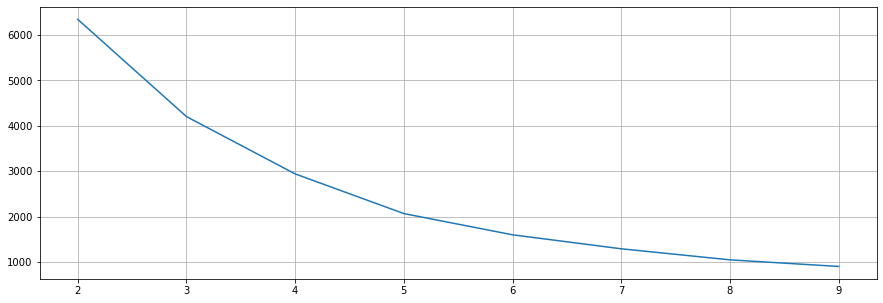

In [68]:
plt.figure(figsize = (15, 5))
plt.plot(range(2, 10), distortion)
plt.grid(True)

### <div class="alert alert-info">Interpretation
**- From the above elbow curve we can take k as 3 because the slope is more at k = 3**</div>

###### Creating Model and fitting it

In [69]:
%%time
model = KMeans(n_clusters = 3, random_state = 10).fit(X)
pred = model.fit_predict(X)

CPU times: total: 297 ms
Wall time: 83.2 ms


In [70]:
CS_df.columns

Index(['reviewerID', 'Recency', 'Frequency', 'price'], dtype='object')

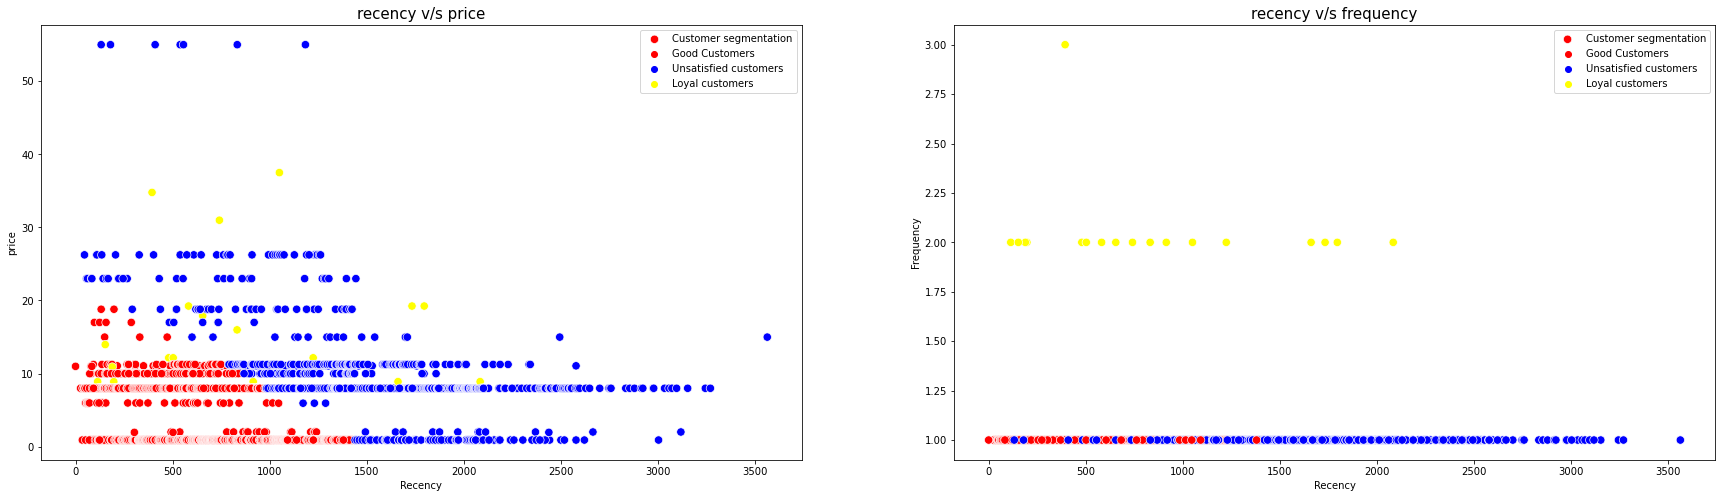

In [71]:
color1 = [ "red", "blue", "Yellow"]
l = ["Customer segmentation", 'Good Customers', 'Unsatisfied customers', 'Loyal customers']
plt.figure(figsize = (30, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(x = CS_df['Recency'], y = CS_df['price'], s = 70, hue =pred, palette = color1)
plt.legend(labels = l)
plt.title('recency v/s price', fontsize = 15)

plt.subplot(1, 2, 2)
sns.scatterplot(x = CS_df['Recency'], y = CS_df['Frequency'], s = 70, hue =pred, palette = color1)
plt.legend(labels = l)
plt.title('recency v/s frequency', fontsize = 15)
plt.show()

### <div class="alert alert-info">Interpretation
**- From the above clustering result we can see cleary 3 types of clusters are there**
- 1. Good customers: They are visiting the sites more frequently and revenue is good
- 2. Unsatisfied customers: They are stop visiting the site for a long time so we can assume that they are not satisfied with the service
- 3. Loyal customers: they are frequently visiting customers aswell as they are generating high revenue than that good customers </div>

## &#10148; Amazon recommendation system</br>
### What Recommendation Systems Can Solve?
- It helps the consumer to find the best product.
- It helps websites to increase user engagement.
- It makes the contents more personalized.
- It helps websites to find the most relevant product for the consumer.
- Help item providers in delivering their items to the right user.

In [72]:
df.columns

Index(['Unnamed: 0', 'asin', 'title', 'overall', 'brand', 'rank', 'verified',
       'reviewerID', 'reviewerName', 'reviewTime', 'price', 'style',
       'category', 'also_buy', 'also_view', 'main_cat', 'similar_item',
       'Review', 'polarity', 'Sentiment', 'unixReviewTime'],
      dtype='object')

In [73]:
df3 = df[['reviewerID', 'asin', 'overall']]

In [74]:
df3.rename(columns = {'asin':'productId', 'overall': 'ratings'}, inplace = True)

In [75]:
df3.head()

,reviewerID,productId,ratings
168,AQP1Z1ZYAYQ5B,B000NJ2TIE,3
169,ATNOW4ID9AXGS,B000NJ2TIE,3
170,A2LJ0XC4FGTTH9,B000NJ2TIE,4
171,A2O27ROXLHLJQB,B000NJ2TIE,4
172,A34N9XXB4M2WC,B000NJ2TIE,4


In [76]:
df3.describe()

,ratings
count,3153.000000
mean,4.209642
std,1.272317
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [77]:
df4=df3.iloc[:1000005,0:]

In [78]:
df4.isnull().sum()

reviewerID    0
productId     0
ratings       0
dtype: int64

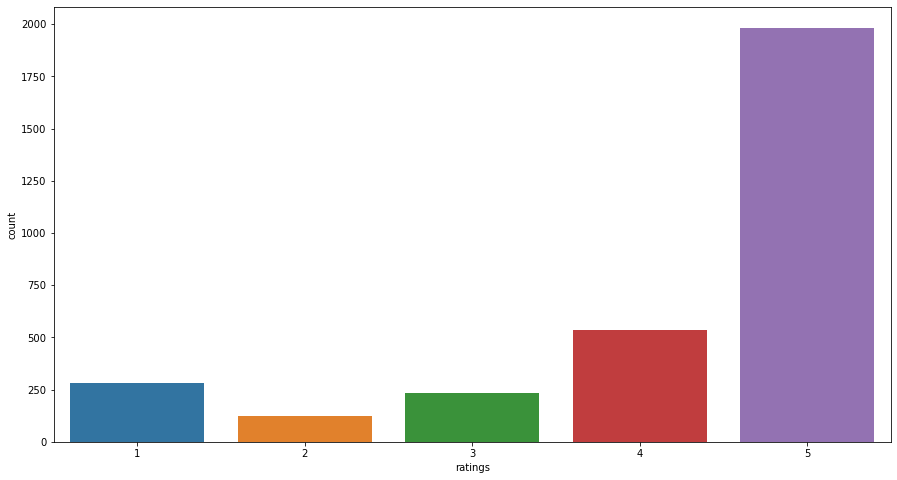

In [79]:
plt.figure(figsize = (15, 8))
sns.countplot(df4['ratings'])
plt.show()

In [80]:
print("\nTotal no of ratings :",df4.shape[0])
print("Total No of Users   :", len(np.unique(df4.reviewerID)))
print("Total No of products  :", len(np.unique(df4.productId)))


Total no of ratings : 3153
Total No of Users   : 3134
Total No of products  : 25


In [81]:
top_rating = df4.groupby(by='reviewerID')['ratings'].count().sort_values(ascending=False)[:10]
print('Top 10 users based on ratings: \n',top_rating)

Top 10 users based on ratings: 
 reviewerID
AU4HQFUN58YIW     3
A2GOZPDFLJKQX0    2
AI82VEZNUO41Q     2
A2LFYB1MIK9AUA    2
A1VNC6K6L1TTOU    2
AWS5GNOJR2UKH     2
ATDKHLG0OG2JQ     2
AX7SYT1D39ARF     2
AL36SB9DTC6J0     2
A1RRSWSB56M7HL    2
Name: ratings, dtype: int64


In [82]:
new_df=df4.groupby("productId").filter(lambda x:x['ratings'].count() >=50)
new_df

,reviewerID,productId,ratings
168,AQP1Z1ZYAYQ5B,B000NJ2TIE,3
169,ATNOW4ID9AXGS,B000NJ2TIE,3
170,A2LJ0XC4FGTTH9,B000NJ2TIE,4
171,A2O27ROXLHLJQB,B000NJ2TIE,4
172,A34N9XXB4M2WC,B000NJ2TIE,4
...,...,...,...
3876,A2HSP1NK0R0JQ7,B00TJ2FKZK,5
3877,A33JNU8JP3P2K2,B00TJ2FKZK,4
3878,A119V2OALGWSQC,B00TJ2FKZK,3
3879,A2FXBLXE4FBQ0B,B00TJ2FKZK,4


In [83]:
new_df1=new_df.head(10000)

ratings_matrix = new_df1.pivot_table(values='ratings', index='productId', columns='reviewerID', fill_value=0)
ratings_matrix.head()

reviewerID,A0013678X7QKF8U1XPGX,A0355753H0ZCKQS6BAJW,A10044ECXDUVKS,A100STMN7BADN9,A1027EKU4ROGY1,A102F7EHNVW30Q,A103DSGWA3BCYZ,A104VNU11956SX,A10B2J2IRQXBWA,A10FE1L5SP6PAL,...,AZF4QWM6781EI,AZGLYTQPAOBQO,AZO0EBB6ZQH4B,AZOC4URW494KC,AZOMMYW6VEVP9,AZPDO6FLSMLFP,AZV5ARAX0ATED,AZX7KY7HSFUB3,AZX8430GYNZSB,AZXT60Y6T9FGR
productId,,,,,,,,,,,,,,,,,,,,,
B000NJ2TIE,0,0,4,5,0,0,5,0,5,5,...,0,0,0,0,0,5,0,5,0,0
B000R4KX88,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B0017I2CPA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B004M4PC3U,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B005BSOVRY,0,0,0,0,5,5,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0


In [84]:
print('Shape of the pivot table: ', ratings_matrix.shape)

Shape of the pivot table:  (11, 2858)


In [85]:
X = ratings_matrix

In [86]:
X.shape

(11, 2858)

In [87]:
%%time
from sklearn.decomposition import TruncatedSVD       # used for dimensionality reduction
SVD = TruncatedSVD(n_components=5)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

CPU times: total: 62.5 ms
Wall time: 60.8 ms


(11, 5)

In [88]:
decomposed_matrix

array([[ 1.30214217e+02, -1.11586866e+00, -5.21365988e-15,
        -2.31509248e-15, -9.28246952e-02],
       [ 1.19217065e-16,  1.08504476e-15,  2.86630216e-16,
         7.51263345e-16,  4.29402002e-15],
       [-6.25728655e-17, -2.02902793e-15, -1.85813201e-15,
         1.05661087e-14, -7.30778306e-14],
       [ 2.85659683e-01,  2.73982576e-01,  4.55188681e-15,
         7.59388327e-15,  6.72630710e-01],
       [ 1.46340361e+00,  9.91145076e+01,  1.05740546e-12,
         1.10144975e-13, -4.08195696e-01],
       [ 2.36049501e-01,  7.59034734e-01,  3.55419416e-14,
         1.29022163e-14,  5.29219759e+01],
       [-9.62411421e-17, -2.38134779e-15,  1.21408461e-01,
         3.23432406e-15, -5.08340933e-16],
       [ 8.33477590e-16, -1.17612021e-13, -3.62150907e-14,
         9.04212364e+01, -1.37649830e-14],
       [-7.82064709e-17, -7.17888499e-16,  2.68027952e-16,
         6.70628568e-16, -1.67429250e-15],
       [-8.19493259e-15, -1.04977952e-12,  9.57914293e+01,
         1.92325047e-15

In [89]:
%%time
correlation_matrix = np.corrcoef(decomposed_matrix)        # Return Pearson product-moment correlation coefficients.
correlation_matrix.shape

CPU times: total: 0 ns
Wall time: 0 ns


(11, 11)

In [90]:
l = list(X.index)

- The Pearson product-moment correlation coefficient (or Pearson correlation coefficient) is a measure of the strength of a linear association between two variables

In [91]:
def recommend(s):
    l = list(X.index)
    h = l.index(s)
    i=X.index[h]
    correlation_product_ID = correlation_matrix[h]
    Recommend = list(X.index[correlation_product_ID > 0.05])
    Recommend.remove(i)
    print(Recommend[0:5])

In [92]:
s = 'B004M4PC3U'

In [93]:
k = recommend(s)

['B000NJ2TIE', 'B000R4KX88', 'B005BSOVRY', 'B005MII5MK', 'B00TJ2FKZK']


In [94]:
k = ['B000NJ2TIE', 'B000R4KX88', 'B0017I2CPA', 'B005BSOVRY', 'B005MII5MK']

In [95]:
j = df[df.asin == 'B0017I2CPA']['title'].values
j[0]

' Kala Soprano Ukulele Gig Bag'

In [96]:
p = []
for i in k:
    j = df[df.asin == i]['title'].values
    p.append(j[0])

In [97]:
p

['Behringer Ultravoice XM1800S Dynamic Cardioid Vocal and Instrument Microphones, Set of 3',
 'Beistle 50820 Coconut Ukulele, 17-Inch',
 ' Kala Soprano Ukulele Gig Bag',
 "Pyle-Pro Professional Moving Coil Dynamic Cardioid Unidirectional Vocal Handheld Microphone Includes 15ft XLR Audio Cable to 1/4'' Audio Connection (PDMIC78)",
 'PYLE PMKSDT25']

In [98]:
j[0]

'PYLE PMKSDT25'

In [99]:
df.columns

Index(['Unnamed: 0', 'asin', 'title', 'overall', 'brand', 'rank', 'verified',
       'reviewerID', 'reviewerName', 'reviewTime', 'price', 'style',
       'category', 'also_buy', 'also_view', 'main_cat', 'similar_item',
       'Review', 'polarity', 'Sentiment', 'unixReviewTime'],
      dtype='object')

In [100]:
df[['title', 'asin']]

,title,asin
168,Behringer Ultravoice XM1800S Dynamic Cardioid ...,B000NJ2TIE
169,Behringer Ultravoice XM1800S Dynamic Cardioid ...,B000NJ2TIE
170,Behringer Ultravoice XM1800S Dynamic Cardioid ...,B000NJ2TIE
171,Behringer Ultravoice XM1800S Dynamic Cardioid ...,B000NJ2TIE
172,Behringer Ultravoice XM1800S Dynamic Cardioid ...,B000NJ2TIE
...,...,...
4309,Fire Force 1&quot; Cinch Strap with Military A...,B00SUQ9F4S
4310,Fire Force 1&quot; Cinch Strap with Military A...,B00SUQ9F4S
4343,"C CLTEIN Guitar Strap Lock Set, Heavy Duty Met...",B00VG3H47M
4344,"C CLTEIN Guitar Strap Lock Set, Heavy Duty Met...",B00VG3H47M


### <div class="alert alert-info">Interpretation
**- From the above recomendation system we can see by using the correlation matrix the products are recomended based on the related product so this will help the customers to find the related products and it will generate the good revenue for the company aswell**

## Conclusion

**- SENTIMENTAL ANALYSIS**
- Model is able to detect and translate all the languages to English
- Model is able to Automate Sentiment Predictions

**- CLUSTERING**
- Model is able to segregate top and bottom products
- Model is able to create segments based on customer perceptions

**- PRODUCT RECOMMENDATION**
- Model is able to recommend related products based on customer purchase
- Model is able to forecast future trend of the sentiments

In [101]:
import joblib

In [102]:
joblib.dump(vectorizer,'vectorizer.joblib')
joblib.dump(logi_model,'logi_model.joblib')

['logi_model.joblib']

In [103]:
import tkinter as tk
from tkinter import ttk
from PIL import ImageTk, Image
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
import threading

def classify_text():
    text = text_box.get("1.0", "end").strip()
    if not text:
        result_label.configure(text="Please enter some text.")
        return
    text_features = vectorizer.transform([text])
    prediction = logi_model.predict(text_features)[0]
    result_label.configure(text=f"Prediction: {prediction}")

def classify_text_threaded():
    # Create a new thread for the analysis function
    t = threading.Thread(target=classify_text)
    t.start()

root = tk.Tk()
root.title("NLP Analysis")

# Load classification model
logi_model = joblib.load("logi_model.joblib")
vectorizer = joblib.load("vectorizer.joblib")

# Load and resize image
img = Image.open("Shona Babu.jpg")
img = img.resize((root.winfo_screenwidth(), root.winfo_screenheight()), Image.ANTIALIAS)
img_tk = ImageTk.PhotoImage(img)

# Create a canvas and set the background image
canvas = tk.Canvas(root, width=root.winfo_screenwidth(), height=root.winfo_screenheight())
canvas.create_image(0, 0, anchor="nw", image=img_tk)
canvas.pack(fill="both", expand=True)

# Create frame to hold the text box and analysis button
frame = ttk.Frame(canvas)
frame.place(relx=0.5, rely=0.5, anchor="center")

# Create Text widget
text_box = tk.Text(frame, height=10, width=40, wrap="word", font=("Arial", 12),highlightbackground="Black", highlightthickness=0, bg="Black", fg="goldenrod")
text_box.insert(tk.END, "Enter text here...")
text_box.grid(row=0, column=0, padx=20, pady=20, sticky="w"+"e"+"n"+"s")
text_box.pack(padx=10,pady=10)


# Create Analysis button
sentiment_button = ttk.Button(frame, text="Analyze", command=classify_text_threaded, width=10)
sentiment_button.pack(side="left",padx=10,pady=5)

# Create label to display results
result_label = ttk.Label(canvas, text="", font=("Arial", 14), background="goldenrod")
result_label.pack(pady=10)

# Set focus to Text widget and move cursor to beginning
text_box.focus_set()
text_box.tag_add("start", "0.5", "0.5")

root.mainloop()


In [1]:
import kivy
kivy.require('1.11.1')

from kivy.app import App
from kivy.uix.label import Label
from kivy.uix.gridlayout import GridLayout
from kivy.uix.textinput import TextInput

class MyGrid(GridLayout):
    
    def __init__(self, **kwargs):
        super(MyGrid, self).__init__(**kwargs)
        self.cols = 2
        
        self.add_widget(Label(text='Enter your name: '))
        self.name = TextInput(multiline=False)
        self.add_widget(self.name)
        
        self.add_widget(Label(text='Enter your age: '))
        self.age = TextInput(multiline=False)
        self.add_widget(self.age)
        
        self.submit = Button(text="Submit", font_size=40)
        self.submit.bind(on_press=self.button_pressed)
        self.add_widget(Label())
        self.add_widget(self.submit)
        
    def button_pressed(self, instance):
        name = self.name.text
        age = self.age.text
        print(f"Hello {name}, you are {age} years old.")

class MyApp(App):
    
    def build(self):
        return MyGrid()

if __name__ == '__main__':
    MyApp().run()


[INFO   ] [Logger      ] Record log in C:\Users\ARCHIT\.kivy\logs\kivy_23-04-06_1.txt
[INFO   ] [deps        ] Successfully imported "kivy_deps.angle" 0.3.3
[INFO   ] [deps        ] Successfully imported "kivy_deps.glew" 0.3.1
[INFO   ] [deps        ] Successfully imported "kivy_deps.sdl2" 0.4.5
[INFO   ] [Kivy        ] v2.1.0
[INFO   ] [Kivy        ] Installed at "C:\Users\ARCHIT\anaconda3\lib\site-packages\kivy\__init__.py"
[INFO   ] [Python      ] v3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
[INFO   ] [Python      ] Interpreter at "C:\Users\ARCHIT\anaconda3\python.exe"
[INFO   ] [Logger      ] Purge log fired. Processing...
[INFO   ] [Logger      ] Purge finished!
[INFO   ] [Factory     ] 189 symbols loaded
[INFO   ] [Image       ] Providers: img_tex, img_dds, img_sdl2, img_pil (img_ffpyplayer ignored)
[INFO   ] [Text        ] Provider: sdl2
[INFO   ] [Window      ] Provider: sdl2
[INFO   ] [GL          ] Using the "OpenGL" graphics system
[INFO   ] [GL         

NameError: name 'Button' is not defined

In [117]:
!pip install Kivy

     ---------------------------------------- 4.0/4.0 MB 7.7 MB/s eta 0:00:00
     -------------------------------------- 123.6/123.6 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 3.1/3.1 MB 9.3 MB/s eta 0:00:00
     ---------------------------------------- 4.8/4.8 MB 9.9 MB/s eta 0:00:00
